In [21]:
from dharpa.graphs.utils import graph_to_image
%load_ext autoreload
%autoreload 2

import networkx as nx
from dharpa.data.inputs import DataType
from dharpa.utils import find_all_module_classes
from dharpa.workflows.workflow import DharpaWorkflow

find_all_module_classes()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'dharpa_workflow': dharpa.workflows.workflow.DharpaWorkflow,
 'or': dharpa.modules.core.logic_gates.OrProcessingModule,
 'and': dharpa.modules.core.logic_gates.AndProcessingModule,
 'not': dharpa.modules.core.logic_gates.NotProcessingModule}

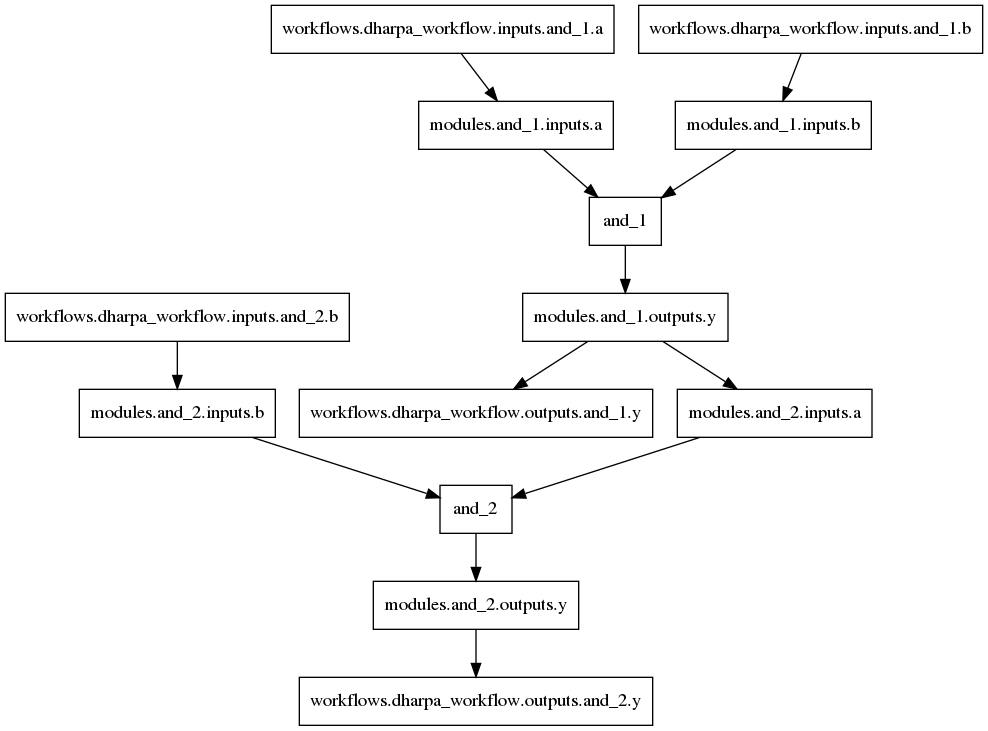

In [22]:
dw = DharpaWorkflow.from_file("/home/markus/projects/dharpa/dharpa-toolbox/tests/workflows/logic_2.yaml")

graph = dw.structure.data_flow_graph

graph_to_image(graph)

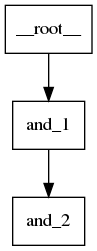

In [23]:
graph_to_image(dw.structure.execution_graph)